In [1]:
#train_test_split
#linear_regression
#cost function metrics 


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\LENOVO\Downloads\Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
data.shape

(545, 13)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [7]:
data.describe (include='object')


,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [8]:
data["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [9]:
#if you have to find all number column at ones 
numerical_col = data.select_dtypes(np.number).columns
numerical_col

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [10]:
for i in numerical_col:
    print()
    print(data[i].value_counts)
    print("___________________________")


<bound method IndexOpsMixin.value_counts of 0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64>
___________________________

<bound method IndexOpsMixin.value_counts of 0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64>
___________________________

<bound method IndexOpsMixin.value_counts of 0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64>
___________________________

<bound method IndexOpsMixin.value_counts of 0      2
1      4
2      2
3      2
4      1
      ..
540    1
541    1
542    1
543    1
544    1
Name: bathrooms, Length: 545, dtype: int64>
___________________________

<bound method IndexOpsMixin.value_c

### Function 

In [12]:
def attribute_info(df_col):
    
    print(f'Description Of attributes: /n /n {df_col.describe()}/n')
    print(f'Unique Number : /n /n {df_col.unique()}/n')
    print(f'MIssing NUmber : /n /n {df_col.isnull().sum()}/n')

In [13]:
attribute_info(data['area'])

Description Of attributes: /n /n count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64/n
Unique Number : /n /n [ 7420  8960  9960  7500  8580 16200  8100  5750 13200  6000  6550  3500
  7800  6600  8500  4600  6420  4320  7155  8050  4560  8800  6540  8875
  7950  5500  7475  7000  4880  5960  6840  7482  9000  6360  6480  4300
  7440  6325  5150 11440  7680  8880  6240 11175  7700 12090  4000  5020
  4040  4260  6500  5700 10500  3760  8250  6670  3960  7410  5000  6750
  4800  7200  4100  6400  6350  4500  5450  3240  6615  8372  9620  6800
  8000  6900  3700  7020  7231  6254  7320  6525 15600  7160 11460  5828
  5200  5400  4640  5800  6660  4700  5136  4400  3300  3650  6100  2817
  7980  3150  6210  6825  6710  6450 10269  8400  5300  3800  9800  8520
  6050  7085  3180  3410  3000 11410  5720  3540  7600 10700  8150  4410
  7686  28

In [14]:
attribute_info(data['bedrooms'])

Description Of attributes: /n /n count    545.000000
mean       2.965138
std        0.738064
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: bedrooms, dtype: float64/n
Unique Number : /n /n [4 3 5 2 6 1]/n
MIssing NUmber : /n /n 0/n


In [15]:
for col in data:
    print(f"\033[1m---------------------{col}--------------------------\033[0m")
    print("\n \n")
    attribute_info(data[col])
    print()

---------------------price--------------------------

 

Description Of attributes: /n /n count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64/n
Unique Number : /n /n [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  59430

## Data Visualization

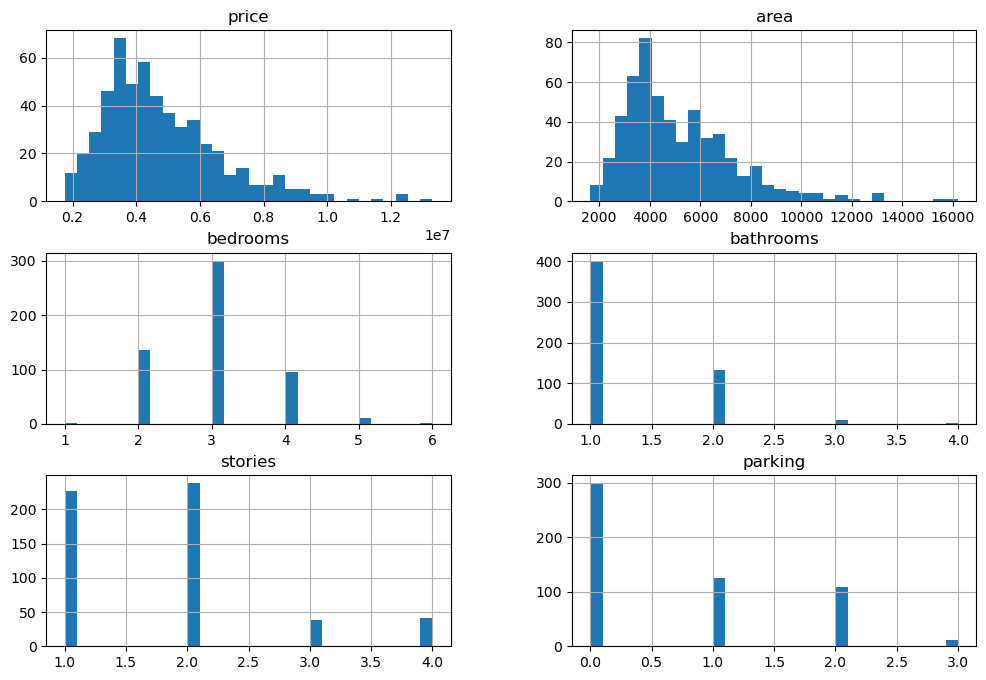

In [18]:
data.hist(figsize=(12,8), bins=30)
plt.show()

## Outlier Detection

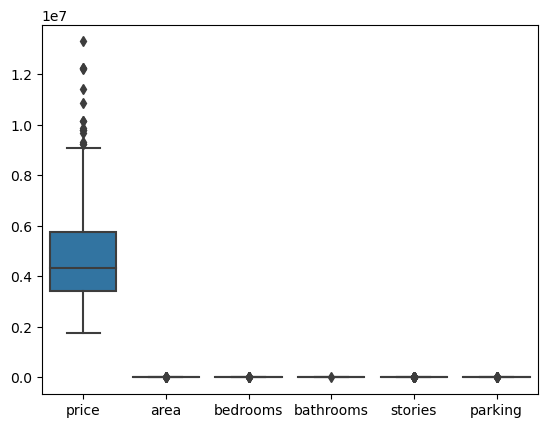

In [20]:
sns.boxplot(data)
plt.show()

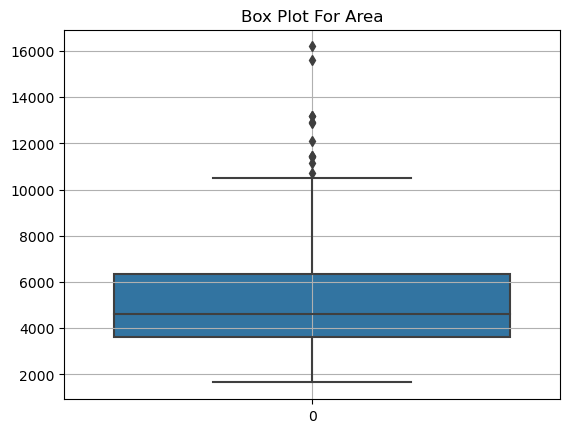

In [21]:
sns.boxplot(data['area'])
plt.title('Box Plot For Area')
plt.grid()

In [22]:
len(data[data['area'] > 10000]) 

18

In [23]:
data[data['area'] > 10000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished
82,6615000,10500,3,2,1,yes,no,yes,no,yes,1,yes,furnished
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished
142,5600000,10500,4,2,2,yes,no,no,no,no,1,no,semi-furnished


In [24]:
data[data['area'] > 10000].index

Index([  7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 186, 191,
       211, 224, 277, 403],
      dtype='int64')

In [25]:
data.drop(index=[7,  10,  56,  64,  66,  69,  82, 125, 129, 142, 146, 171, 186, 191,
       211, 224, 277, 403], axis=1, inplace=True)

In [26]:
data.shape

(527, 13)

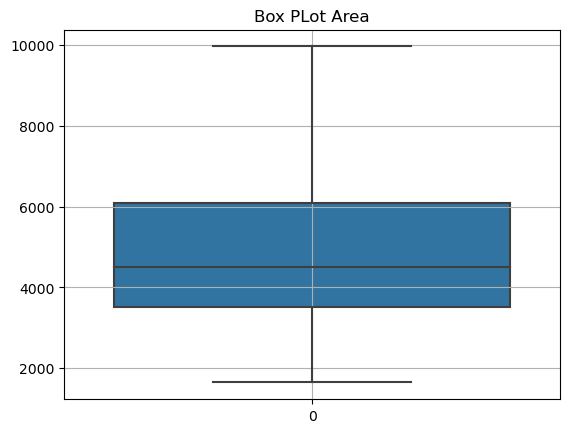

In [167]:
sns.boxplot(data['area'])
plt.title("Box PLot Area")
plt.grid()

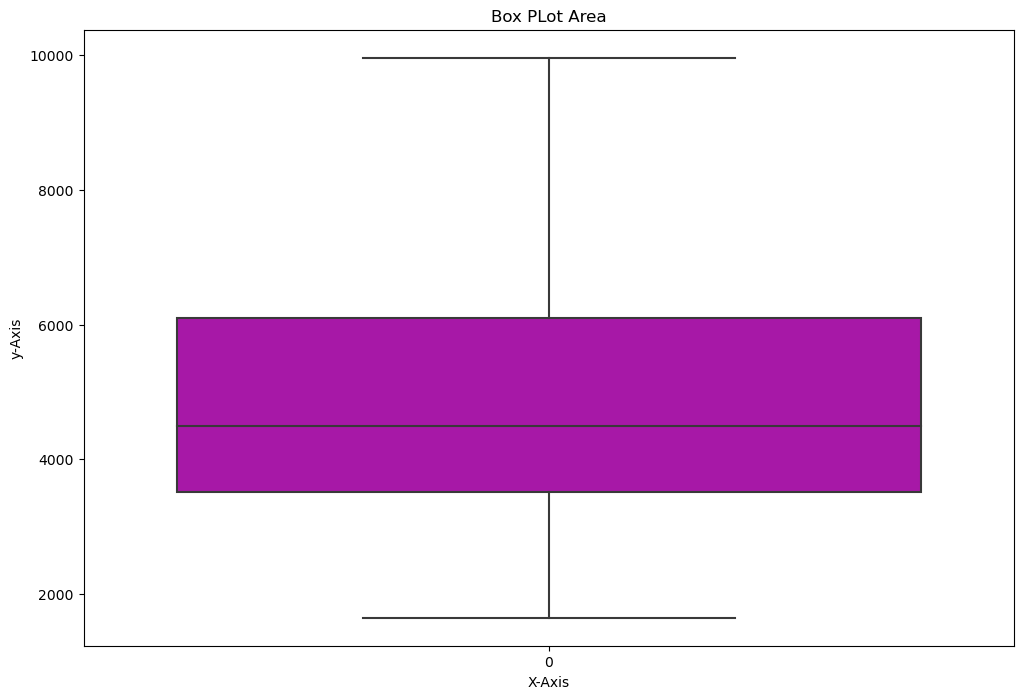

In [169]:
plt.figure(figsize=(12,8))
sns.boxplot(data['area'],color = 'm')
plt.xlabel('X-Axis')
plt.ylabel('y-Axis')
plt.title("Box PLot Area")
plt.show()

## Duplicacy in Data 

In [30]:
data.duplicated().sum()

0

In [31]:
data[data.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [32]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Encoding technique 

In [34]:
data['mainroad'].value_counts()

mainroad
yes    450
no      77
Name: count, dtype: int64

In [35]:
data['furnishingstatus']

0           furnished
1           furnished
2      semi-furnished
3           furnished
4           furnished
            ...      
540       unfurnished
541    semi-furnished
542       unfurnished
543         furnished
544       unfurnished
Name: furnishingstatus, Length: 527, dtype: object

In [36]:
data.select_dtypes(include='object').columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [171]:
data['mainroad']= data['mainroad'].map({'yes':0, 'no':1})
data['guestroom']= data['guestroom'].map({'yes':0, 'no':1})
data['basement']= data['basement'].map({'yes':0, 'no':1})
data['hotwaterheating']= data['hotwaterheating'].map({'yes':0, 'no':1})
data['airconditioning']= data['airconditioning'].map({'yes':0, 'no':1})
data['prefarea']= data['prefarea'].map({'yes':0, 'no':1})
data['furnishingstatus']= data['furnishingstatus'].map({'unfurnished':0, 'semi-furnished':1, 'furnished':2})

# Corelation Matrix (corelation between two variables)

In [39]:
data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.567533,0.363087,0.523598,0.436631,-0.294219,-0.274681,-0.182899,-0.092098,-0.465431,0.384819,-0.325323,0.301598
area,0.567533,1.000000,0.170949,0.236109,0.151585,-0.306569,-0.222279,-0.067879,0.024542,-0.289730,0.380676,-0.216596,0.168938
bedrooms,0.363087,0.170949,1.000000,0.358827,0.410117,0.012990,-0.083404,-0.101052,-0.060287,-0.172246,0.146721,-0.088338,0.134165
bathrooms,0.523598,0.236109,0.358827,1.000000,0.329708,-0.043653,-0.132679,-0.111263,-0.075061,-0.196998,0.191378,-0.074563,0.154913
stories,0.436631,0.151585,0.410117,0.329708,1.000000,-0.128244,-0.037583,0.177480,-0.025219,-0.307300,0.052770,-0.050708,0.112331
mainroad,-0.294219,-0.306569,0.012990,-0.043653,-0.128244,1.000000,0.097798,0.045363,-0.012713,0.108541,-0.201547,0.196413,-0.154479
guestroom,-0.274681,-0.222279,-0.083404,-0.132679,-0.037583,0.097798,1.000000,0.373888,-0.008770,0.143478,-0.050156,0.182851,-0.127060
basement,-0.182899,-0.067879,-0.101052,-0.111263,0.177480,0.045363,0.373888,1.000000,-0.008105,0.037390,-0.056907,0.234388,-0.103237
hotwaterheating,-0.092098,0.024542,-0.060287,-0.075061,-0.025219,-0.012713,-0.008770,-0.008105,1.000000,-0.129213,-0.070775,-0.051828,-0.022896
airconditioning,-0.465431,-0.289730,-0.172246,-0.196998,-0.307300,0.108541,0.143478,0.037390,-0.129213,1.000000,-0.154178,0.113560,-0.151853


<Axes: >

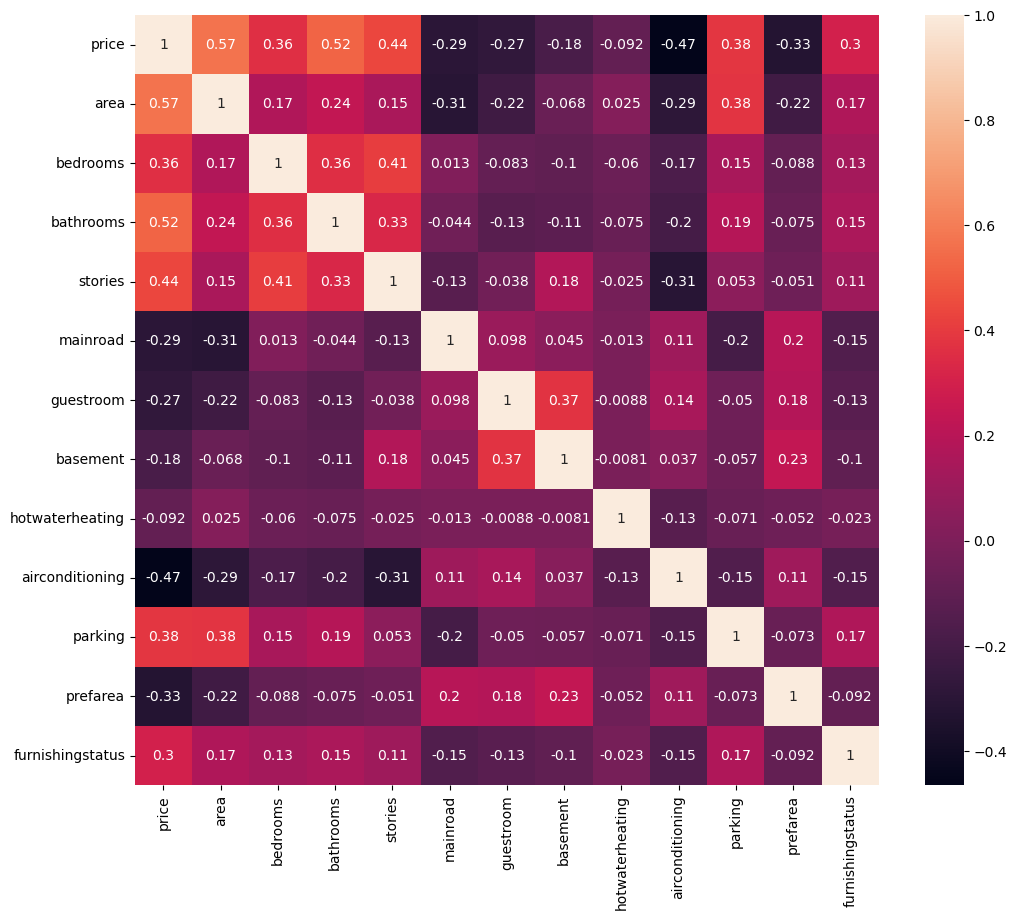

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)

In [41]:
data.corr()['price']

price               1.000000
area                0.567533
bedrooms            0.363087
bathrooms           0.523598
stories             0.436631
mainroad           -0.294219
guestroom          -0.274681
basement           -0.182899
hotwaterheating    -0.092098
airconditioning    -0.465431
parking             0.384819
prefarea           -0.325323
furnishingstatus    0.301598
Name: price, dtype: float64

# Model Building

In [43]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [44]:
data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,2
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,2
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,1
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,2
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,2


# Seprating Dependent And Independent Variables 

In [46]:
# method 1
X = data.iloc[:,1:] # Take all Rows and column start from 1 to all
y = data.iloc[:,0] # Take all rows and column 0 only which is price 

In [47]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,0,1,1,1,0,2,0,2
1,8960,4,4,4,0,1,1,1,0,3,1,2
2,9960,3,2,2,0,1,0,1,1,2,0,1
3,7500,4,2,2,0,1,0,1,0,3,0,2
4,7420,4,1,2,0,0,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,0,1,0,1,1,2,1,0
541,2400,3,1,1,1,1,1,1,1,0,1,1
542,3620,2,1,1,0,1,1,1,1,0,1,0
543,2910,3,1,1,1,1,1,1,1,0,1,2


In [48]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 527, dtype: int64

In [49]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [50]:
#method 2 
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
 'parking', 'prefarea', 'furnishingstatus']]
y = data['price']

In [51]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 527, dtype: int64

In [52]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,0,1,1,1,0,2,0,2
1,8960,4,4,4,0,1,1,1,0,3,1,2
2,9960,3,2,2,0,1,0,1,1,2,0,1
3,7500,4,2,2,0,1,0,1,0,3,0,2
4,7420,4,1,2,0,0,0,1,0,2,1,2


In [177]:
# split train and test  Total 100% data and 80% train data of x and y 20% of train and test 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42) #0.2 means 20% test data

In [54]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
75,4260,4,2,2,0,1,1,0,1,0,1,1
382,3150,3,1,2,0,1,0,1,1,0,1,2
528,3970,1,1,1,1,1,1,1,1,0,1,0
324,4500,3,1,2,1,1,0,1,0,0,1,1
295,2325,3,1,2,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
77,6500,3,2,3,0,1,1,1,0,0,0,2
113,9620,3,1,1,0,1,0,1,1,2,0,2
287,5500,3,1,2,0,1,1,1,0,0,1,0
453,3069,2,1,1,0,1,1,1,1,1,1,0


In [55]:
X_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
329,3960,3,1,2,0,1,1,1,1,0,1,2
411,2145,3,1,3,0,1,1,1,1,0,0,2
6,8580,4,3,4,0,1,1,1,0,2,0,1
298,5800,3,1,1,0,1,1,0,1,2,1,1
85,8250,3,2,3,0,1,1,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
301,3520,3,1,2,0,1,1,1,1,0,0,1
321,3630,3,2,2,0,1,1,0,1,2,1,1
219,7000,3,1,2,0,1,0,1,1,0,1,0
165,6450,3,2,1,0,0,0,0,1,0,1,0


In [56]:
y_train

75     6650000
382    3570000
528    2275000
324    4007500
295    4200000
        ...   
77     6650000
113    6083000
287    4200000
453    3150000
109    6090000
Name: price, Length: 421, dtype: int64

In [57]:
y_test

329     3990000
411     3430000
6      10150000
298     4200000
85      6510000
         ...   
301     4200000
321     4025000
219     4795000
165     5383000
381     3605000
Name: price, Length: 106, dtype: int64

# Model Training

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
X_test.shape, y_test.shape

((106, 12), (106,))

In [61]:
y_train

75     6650000
382    3570000
528    2275000
324    4007500
295    4200000
        ...   
77     6650000
113    6083000
287    4200000
453    3150000
109    6090000
Name: price, Length: 421, dtype: int64

In [62]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [63]:
y_pred_train[:3] # predicted price by model 

array([5114477.75217059, 3780644.43463791, 2389419.97653788])

In [64]:
X_train.head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
75,4260,4,2,2,0,1,1,0,1,0,1,1
382,3150,3,1,2,0,1,0,1,1,0,1,2
528,3970,1,1,1,1,1,1,1,1,0,1,0


In [65]:
y_train.head(3) #actual price of first three houses 

75     6650000
382    3570000
528    2275000
Name: price, dtype: int64

# Linear Regression
- y = mx + c (simple linear regression)
- y = m1x1 + m2x2+ ....+mnxn + c (Multiple linear regression)

In [67]:
model.coef_

array([ 2.90475128e+02,  1.03738823e+05,  9.26088059e+05,  4.15429922e+05,
       -4.04726201e+05, -3.45414256e+05, -2.59587306e+05, -4.12262844e+05,
       -8.32952912e+05,  2.17441551e+05, -6.08259528e+05,  1.71096494e+05])

In [68]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')

In [69]:
coeff = pd.DataFrame(model.coef_, index = X.columns, columns = ['coefficient'])
coeff

,coefficient
area,290.475128
bedrooms,103738.822891
bathrooms,926088.058843
stories,415429.921876
mainroad,-404726.200550
guestroom,-345414.255542
basement,-259587.305552
hotwaterheating,-412262.844238
airconditioning,-832952.911726
parking,217441.550848


# Model Evaluation Metrics 

## For Training Data

In [72]:
mean_squared_error(y_train, y_pred_train)

992585326302.9519

In [73]:
## Root mean
np.sqrt(mean_squared_error(y_train, y_pred_train))

996285.7653820774

In [74]:
mean_absolute_error(y_train, y_pred_train)

732207.3898180332

In [75]:
r2_score(y_train, y_pred_train)*100

67.57308768485437

In [76]:
round(r2_score(y_train, y_pred_train)*100)

68

In [77]:
print(round(r2_score(y_train, y_pred_train)*100),'%')

68 %


# Fit line graph 

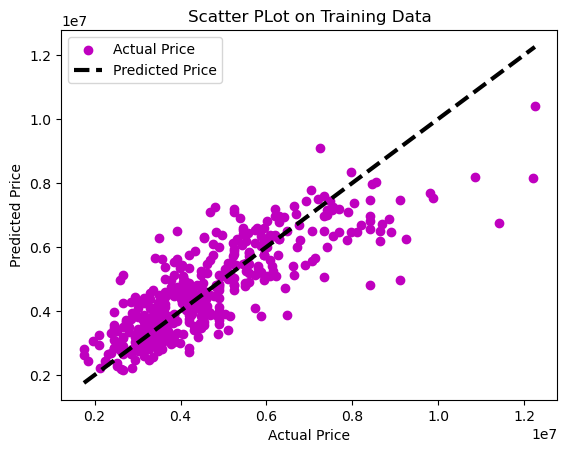

In [79]:
plt.scatter(y_train, y_pred_train, color = 'm', label = "Actual Price")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()] , 
         color='k', linestyle='dashed', linewidth=3, label='Predicted Price') 
plt.title('Scatter PLot on Training Data')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()

# Final Function For Evaluation

In [81]:
# For Fast Evaluation
def training_evaluation(actual , predicted):
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R2 Score: {r2}')

    plt.scatter(y_train, y_pred_train, color = 'm', label = "Actual Price")
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()] , 
         color='k', linestyle='dashed', linewidth=3, label='Predicted Price') 
    plt.title('Scatter PLot on Training Data')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()

MSE: 992585326302.9519
RMSE: 996285.7653820774
MAE: 732207.3898180332
R2 Score: 0.6757308768485437


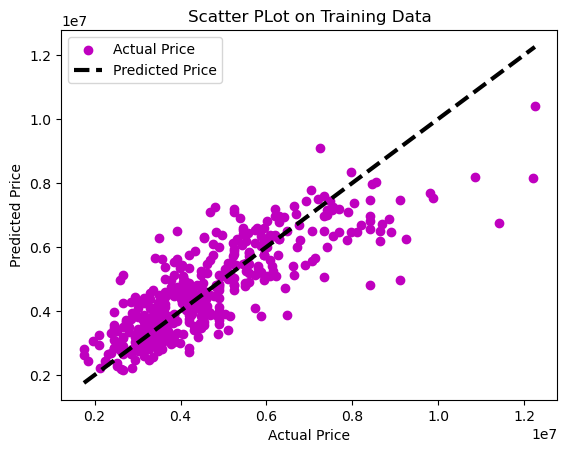

In [82]:
training_evaluation(y_train, y_pred_train)

# For Test DATA 

In [84]:
def training_evaluation(actual , predicted):

    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actual,predicted)
    r2 = r2_score(actual,predicted)
    
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R2 Score: {r2}')
    
    plt.scatter(actual, predicted, color = 'm', label = "Actual Price")
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()] , 
         color='k', linestyle='dashed', linewidth=3, label='Predicted Price') 
    plt.title('Scatter PLot on Training Data')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()

MSE: 1656476192806.8284
RMSE: 1287041.6437733583
MAE: 887360.8541033572
R2 Score: 0.6632007472632169


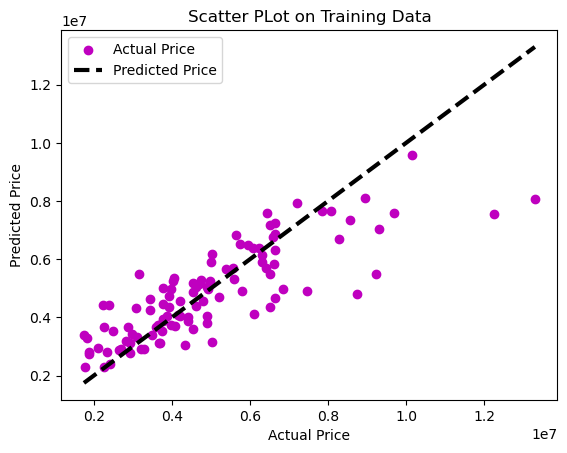

In [85]:
training_evaluation(y_test , y_pred_test)